In [16]:
%run "/Users/nickarhi/Desktop/Studying/Project HSE 4th course/Codes/Data_preprocessing.ipynb"

         Date     Price  Volume  Price change  Volume change
0  2024-04-04  2,449.00     0.0          0.82            NaN
1  2024-04-03  2,429.00     0.0          2.06            NaN


/var/folders/gk/lwvxlf616ggf8j4h0y1hjl6c0000gn/T/ipykernel_91822/1671314584.py:2: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  return_df = return_df.merge(brent[['Date', 'Price change']], on='Date', how='left', suffixes=('_brent'))
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Note: you may need to restart the kernel to use updated packages.
         Date     Price  Volume  Price change  Volume change
0  2024-04-04  2,449.00     0.0          0.82            NaN
1  2024-04-03  2,429.00     0.0          2.06            NaN


/var/folders/gk/lwvxlf616ggf8j4h0y1hjl6c0000gn/T/ipykernel_91822/1671314584.py:2: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  return_df = return_df.merge(brent[['Date', 'Price change']], on='Date', how='left', suffixes=('_brent'))
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Date                      0
Price change              0
Price change_cofee        0
Price change_copper       0
Price change_corn         0
Price change_cotton       0
Price change_gasoline     0
Price change_gold         0
Price change_nickel       0
Price change_palladium    0
Price change_silver       0
Price change_soybean      0
Price change_wheat        0
Price change_wti          0
Price change_zinc         0
Price change_cocoa        0
dtype: int64
Date             0
brent_log        0
cocoa_log        0
cofee_log        0
copper_log       0
corn_log         0
cotton_log       0
gasoline_log     0
gold_log         0
nickel_log       0
palladium_log    0
silver_log       0
soybean_log      0
wheat_log        0
wti_log          0
zinc_log         0
dtype: int64
Fitting GJR-GARCH model for brent_log
Best parameters for brent_log: p=1, o=1, q=1
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                    brent_log   R-square

/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best parameters for cocoa_log: p=1, o=0, q=1
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                    cocoa_log   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7530.89
Distribution:      Standardized Student's t   AIC:                           15071.8
Method:                  Maximum Likelihood   BIC:                           15103.1
                                              No. Observations:                 3864
Date:                      Thu, Apr 25 2024   Df Residuals:                     3863
Time:                              08:38:35   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------

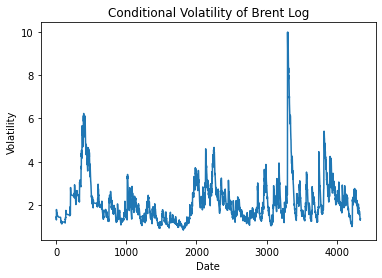

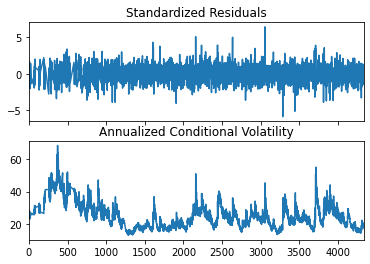

In [17]:
%run "/Users/nickarhi/Desktop/Studying/Project HSE 4th course/Codes/Volatility.ipynb"

1. K-Means

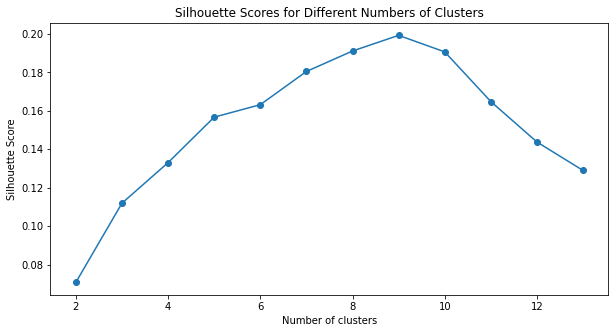

Best number of clusters based on silhouette score: 9


In [39]:
return_log_scaled_cl = return_log_scaled.drop('Date', axis = 1)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()

data_scaled = scaler.fit_transform(return_log_scaled_cl)
data_transposed = data_scaled.T

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = []
for i in range(2, 14):  
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(data_transposed)
    score = silhouette_score(data_transposed, kmeans.labels_)
    silhouette_scores.append(score)


plt.figure(figsize=(10, 5))
plt.plot(range(2, 14), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


best_num_clusters = range(2, 14)[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters based on silhouette score: {best_num_clusters}")

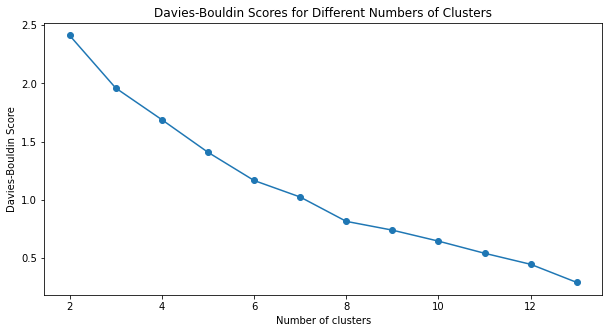

Best number of clusters based on Davies-Bouldin score: 13


In [43]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []
for i in range(2, 14):  
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(data_transposed)
    score = davies_bouldin_score(data_transposed, kmeans.labels_)
    davies_bouldin_scores.append(score)


plt.figure(figsize=(10, 5))
plt.plot(range(2, 14), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()


best_num_clusters = range(2, 14)[davies_bouldin_scores.index(min(davies_bouldin_scores))]
print(f"Best number of clusters based on Davies-Bouldin score: {best_num_clusters}")

In [40]:
from sklearn.cluster import KMeans

data_transposed = data_scaled.T
kmeans = KMeans(n_clusters=9, random_state=0)
commodity_labels = kmeans.fit_predict(data_transposed)
labels = kmeans.labels_

data_clusters = return_log_scaled_cl.T  
data_clusters['Cluster'] = commodity_labels

'''data_clusters = data_clusters.T
'''
centroids = kmeans.cluster_centers_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
data_clusters

,0,1,2,3,4,5,6,7,8,9,...,4328,4329,4330,4331,4332,4333,4334,4335,4336,Cluster
brent_log,1.498713,1.911612,0.069976,0.806737,0.279609,-3.749420,1.390291,-1.116206,1.656209,1.449445,...,-0.924258,1.113774,0.000000,-1.065658,0.159872,-0.350614,2.547280,1.636535,-0.090041,0
cocoa_log,0.000000,-1.440323,1.340969,-0.320513,-1.612938,-1.257878,0.925702,-0.160128,0.049988,3.527061,...,-1.237627,2.829587,-1.633265,-0.813298,4.631090,9.358141,-0.170145,-8.153549,7.955028,6
cofee_log,4.802797,-1.806214,1.074210,-0.090041,0.429078,-1.816397,0.478852,-1.704443,1.004934,0.129916,...,-1.227503,-0.280393,1.990066,-3.562718,1.528262,0.538547,-1.938671,-0.160128,-4.541586,5
copper_log,0.269636,1.833096,-0.551518,-1.501212,-0.531409,-3.583445,2.810143,-1.908089,0.925702,2.371653,...,-0.210221,0.687630,1.262003,-0.883895,0.965326,0.059982,3.198305,-0.380724,1.852730,3
corn_log,-0.904074,-0.783058,-0.914166,-1.460615,2.634978,-0.712532,3.594613,-0.631993,2.761517,1.232375,...,-0.964638,1.084102,1.891988,0.059982,0.468899,0.179838,-0.581689,-0.944446,3.314460,2
cotton_log,-1.126319,-0.974735,3.459464,-0.390762,0.409162,-0.662188,0.965326,-0.621930,1.616858,2.926750,...,-0.350614,1.054421,0.139902,-4.113454,-0.230265,0.179838,-0.350614,-1.511364,0.488803,7
gasoline_log,-0.290421,-0.290421,-1.379471,-0.772980,0.109940,-3.035612,1.133551,-0.762903,0.945516,3.169245,...,-2.071304,0.826574,0.039992,-1.085874,2.322813,0.229736,2.858746,1.557803,0.647897,8
gold_log,1.528262,-0.070025,-0.160128,-0.040008,-1.379471,-2.234786,1.350835,-0.893984,-0.050013,0.518653,...,0.747201,0.786896,0.359354,0.945516,0.179838,-1.015135,0.687630,-0.571631,-0.260339,4
nickel_log,-4.751098,0.667765,-2.296161,-1.187017,-5.340078,-1.268005,0.010000,-7.042246,0.219758,4.200529,...,0.816656,0.000000,0.767051,0.000000,0.049988,0.000000,0.000000,0.000000,0.000000,3
palladium_log,1.133551,0.010000,-1.592615,0.895974,-0.601807,-0.501254,0.657832,0.029996,-0.461061,0.229736,...,-2.767957,10.056905,-0.662188,-1.460615,1.616858,0.816656,2.058663,0.846408,1.084102,1


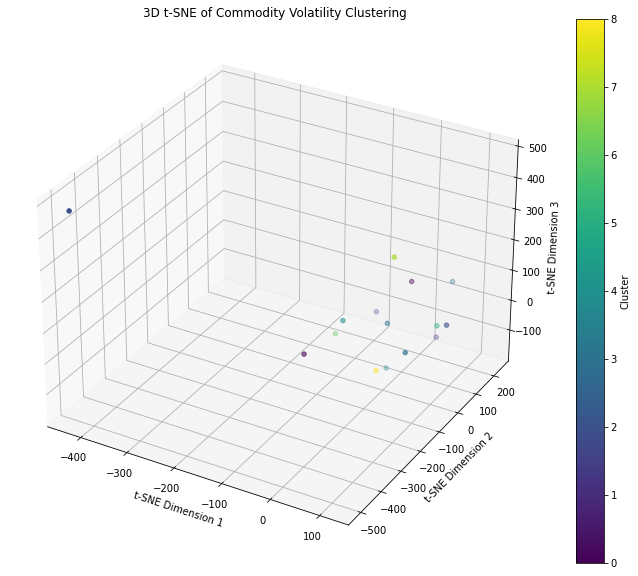

In [41]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


tsne = TSNE(n_components=3, perplexity=14, n_iter=600, random_state=0)
data_tsne_3d = tsne.fit_transform(data_transposed)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(data_tsne_3d[:, 0], data_tsne_3d[:, 1], data_tsne_3d[:, 2], c=labels, cmap='viridis')

fig.colorbar(sc, label='Cluster')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('3D t-SNE of Commodity Volatility Clustering')

plt.show()


In [42]:
data_clusters

,0,1,2,3,4,5,6,7,8,9,...,4328,4329,4330,4331,4332,4333,4334,4335,4336,Cluster
brent_log,1.498713,1.911612,0.069976,0.806737,0.279609,-3.749420,1.390291,-1.116206,1.656209,1.449445,...,-0.924258,1.113774,0.000000,-1.065658,0.159872,-0.350614,2.547280,1.636535,-0.090041,0
cocoa_log,0.000000,-1.440323,1.340969,-0.320513,-1.612938,-1.257878,0.925702,-0.160128,0.049988,3.527061,...,-1.237627,2.829587,-1.633265,-0.813298,4.631090,9.358141,-0.170145,-8.153549,7.955028,6
cofee_log,4.802797,-1.806214,1.074210,-0.090041,0.429078,-1.816397,0.478852,-1.704443,1.004934,0.129916,...,-1.227503,-0.280393,1.990066,-3.562718,1.528262,0.538547,-1.938671,-0.160128,-4.541586,5
copper_log,0.269636,1.833096,-0.551518,-1.501212,-0.531409,-3.583445,2.810143,-1.908089,0.925702,2.371653,...,-0.210221,0.687630,1.262003,-0.883895,0.965326,0.059982,3.198305,-0.380724,1.852730,3
corn_log,-0.904074,-0.783058,-0.914166,-1.460615,2.634978,-0.712532,3.594613,-0.631993,2.761517,1.232375,...,-0.964638,1.084102,1.891988,0.059982,0.468899,0.179838,-0.581689,-0.944446,3.314460,2
cotton_log,-1.126319,-0.974735,3.459464,-0.390762,0.409162,-0.662188,0.965326,-0.621930,1.616858,2.926750,...,-0.350614,1.054421,0.139902,-4.113454,-0.230265,0.179838,-0.350614,-1.511364,0.488803,7
gasoline_log,-0.290421,-0.290421,-1.379471,-0.772980,0.109940,-3.035612,1.133551,-0.762903,0.945516,3.169245,...,-2.071304,0.826574,0.039992,-1.085874,2.322813,0.229736,2.858746,1.557803,0.647897,8
gold_log,1.528262,-0.070025,-0.160128,-0.040008,-1.379471,-2.234786,1.350835,-0.893984,-0.050013,0.518653,...,0.747201,0.786896,0.359354,0.945516,0.179838,-1.015135,0.687630,-0.571631,-0.260339,4
nickel_log,-4.751098,0.667765,-2.296161,-1.187017,-5.340078,-1.268005,0.010000,-7.042246,0.219758,4.200529,...,0.816656,0.000000,0.767051,0.000000,0.049988,0.000000,0.000000,0.000000,0.000000,3
palladium_log,1.133551,0.010000,-1.592615,0.895974,-0.601807,-0.501254,0.657832,0.029996,-0.461061,0.229736,...,-2.767957,10.056905,-0.662188,-1.460615,1.616858,0.816656,2.058663,0.846408,1.084102,1


2. HAC

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

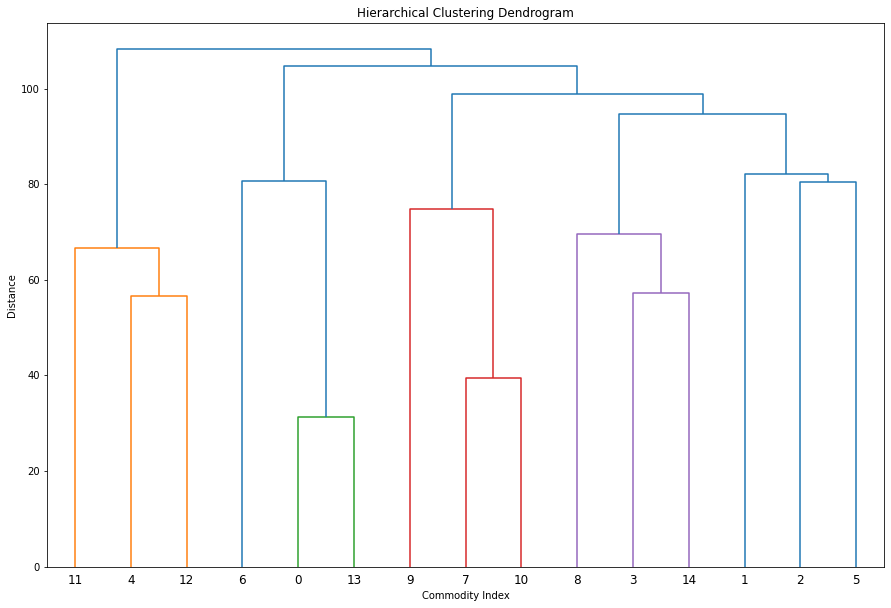

In [23]:
linkage_matrix = linkage(data_transposed, method='ward')
plt.figure(figsize=(15, 10))


dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Commodity Index')
plt.ylabel('Distance')
plt.show()

In [24]:

num_clusters = 8
hac = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
commodity_labels_hac = hac.fit_predict(data_transposed)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


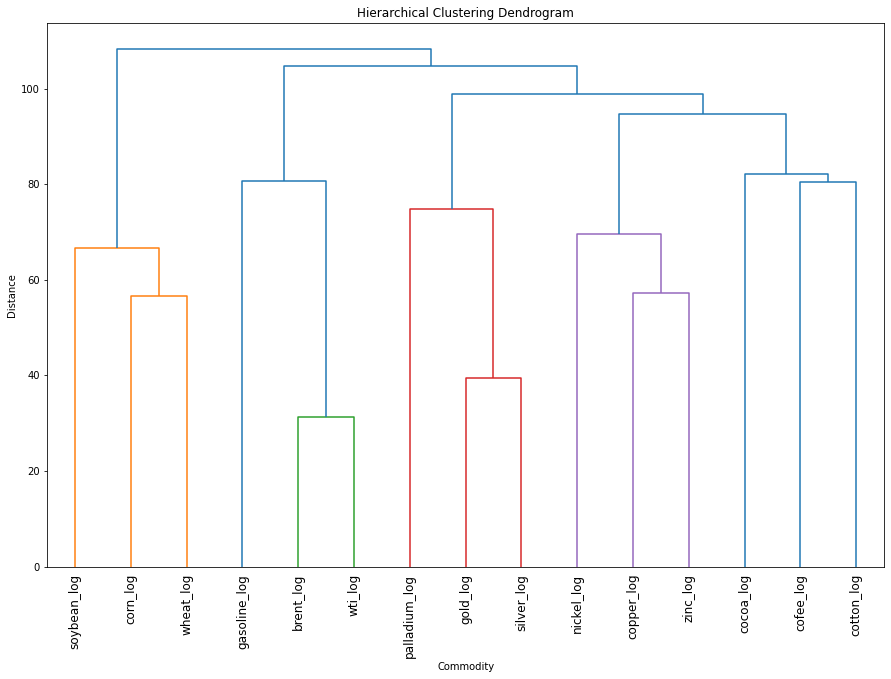

In [25]:

commodity_names = list(return_log_scaled_cl.columns)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=commodity_names, leaf_rotation=90, leaf_font_size=12)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Commodity')
plt.ylabel('Distance')
plt.show()


In [36]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

def calculate_cophenetic_coefficient(linked, data):
    cophenetic_corr, _ = cophenet(linked, pdist(data))
    print("Cophenetic Correlation Coefficient:", cophenetic_corr)
    return cophenetic_corr


cophenetic_return = calculate_cophenetic_coefficient(linkage_matrix, return_log_scaled_cl.T)


Cophenetic Correlation Coefficient: 0.32198858143777576
